In [209]:
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from gplearn import genetic
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
import sklearn.ensemble as ensemble  # ensemble learning: 集成学习
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

                 A1 Ion Radius  A2 Ion Radius  A Ion Radius  B ion Radius  \
A1 Ion Radius         1.000000       0.756094      0.935536      0.022912   
A2 Ion Radius         0.756094       1.000000      0.938530      0.014203   
A Ion Radius          0.935536       0.938530      1.000000      0.019751   
B ion Radius          0.022912       0.014203      0.019751      1.000000   
X1 Ion Radius         0.181573       0.150793      0.177158      0.028878   
...                        ...            ...           ...           ...   
X1 MeltingPoint       0.203231       0.159023      0.193023      0.028742   
X2 MeltingPoint       0.197433       0.153847      0.187172      0.036787   
X3 MeltingPoint       0.198156       0.229901      0.228602      0.035469   
X4 MeltingPoint       0.059750      -0.014030      0.023943      0.040158   
Bandgap(eV)           0.102862       0.089875      0.102763     -0.004928   

                 X1 Ion Radius  X2 Ion Radius  X3 Ion Radius  X4 Ion Radius

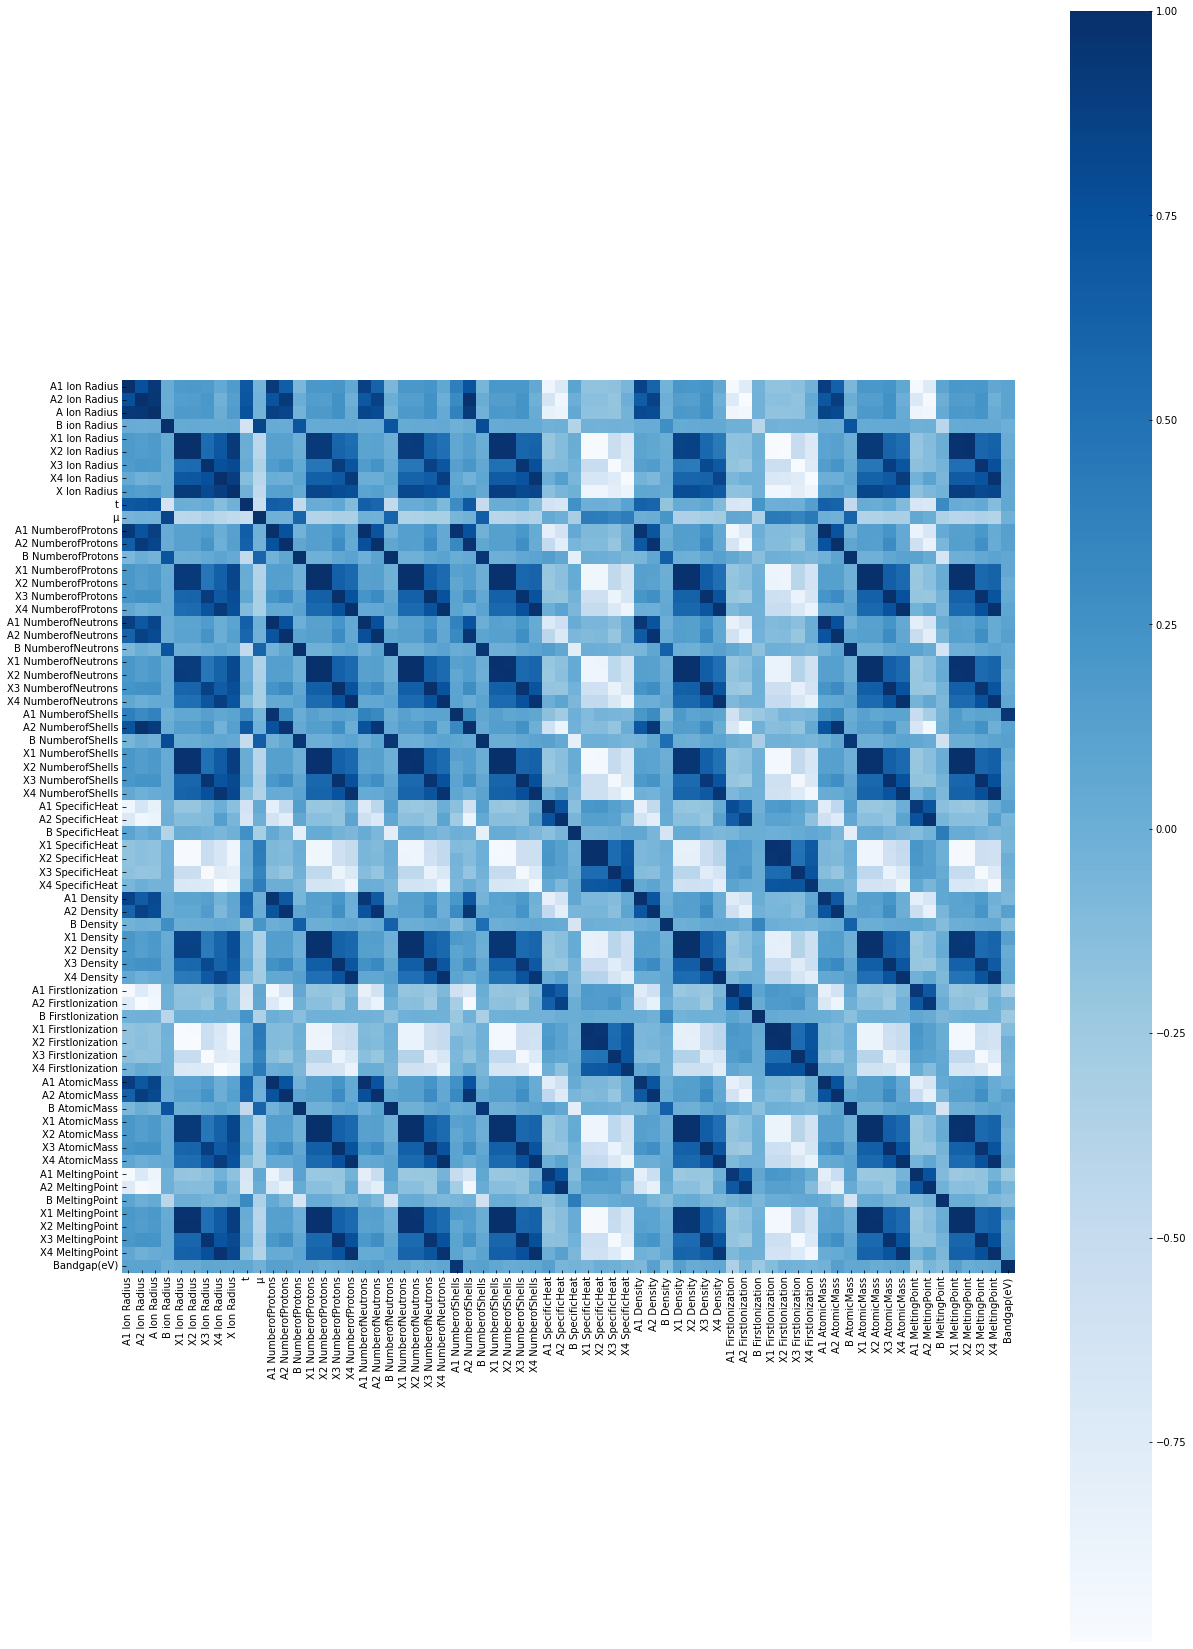

In [210]:
dataset= r'Bandgap.xlsx'
data=pd.DataFrame(pd.read_excel(dataset))
featureData=data.iloc[:,:]
corMat = DataFrame(featureData.corr())  #corr 求相关系数矩阵
print(corMat)
writer = pd.ExcelWriter('output.xlsx')
corMat.to_excel(writer,'Sheet1')
writer.save()
plt.figure(figsize=(20, 30))
sns.heatmap(corMat, annot=False, vmax=1, square=True, cmap="Blues",linewidths=0)
plot.show()

In [211]:
#读取文件
dataset= r'Bandgap After.xlsx'
# dataset1= r'Formation energy Predict.xlsx'
data=pd.DataFrame(pd.read_excel(dataset))
# data1=pd.DataFrame(pd.read_excel(dataset1))

                            t         μ  A2 NumberofNeutrons  \
t                    1.000000 -0.522520             0.586691   
μ                   -0.522520  1.000000            -0.026255   
A2 NumberofNeutrons  0.586691 -0.026255             1.000000   
X4 NumberofNeutrons -0.097562 -0.308882             0.060691   
A1 NumberofShells    0.687985 -0.033774             0.663296   
B NumberofShells    -0.502397  0.653519             0.084812   
A1 SpecificHeat     -0.635718  0.045776            -0.450622   
X3 SpecificHeat     -0.029653  0.361028            -0.212230   
B Density           -0.183562  0.213756             0.049667   
X1 Density           0.022917 -0.333643             0.134507   
X3 Density           0.081529 -0.288983             0.317857   
A1 FirstIonization  -0.689253  0.050261            -0.610261   
B FirstIonization    0.252449 -0.365795            -0.004186   
B MeltingPoint       0.302038 -0.347064            -0.080153   
Bandgap(eV)         -0.090141  0.303263 

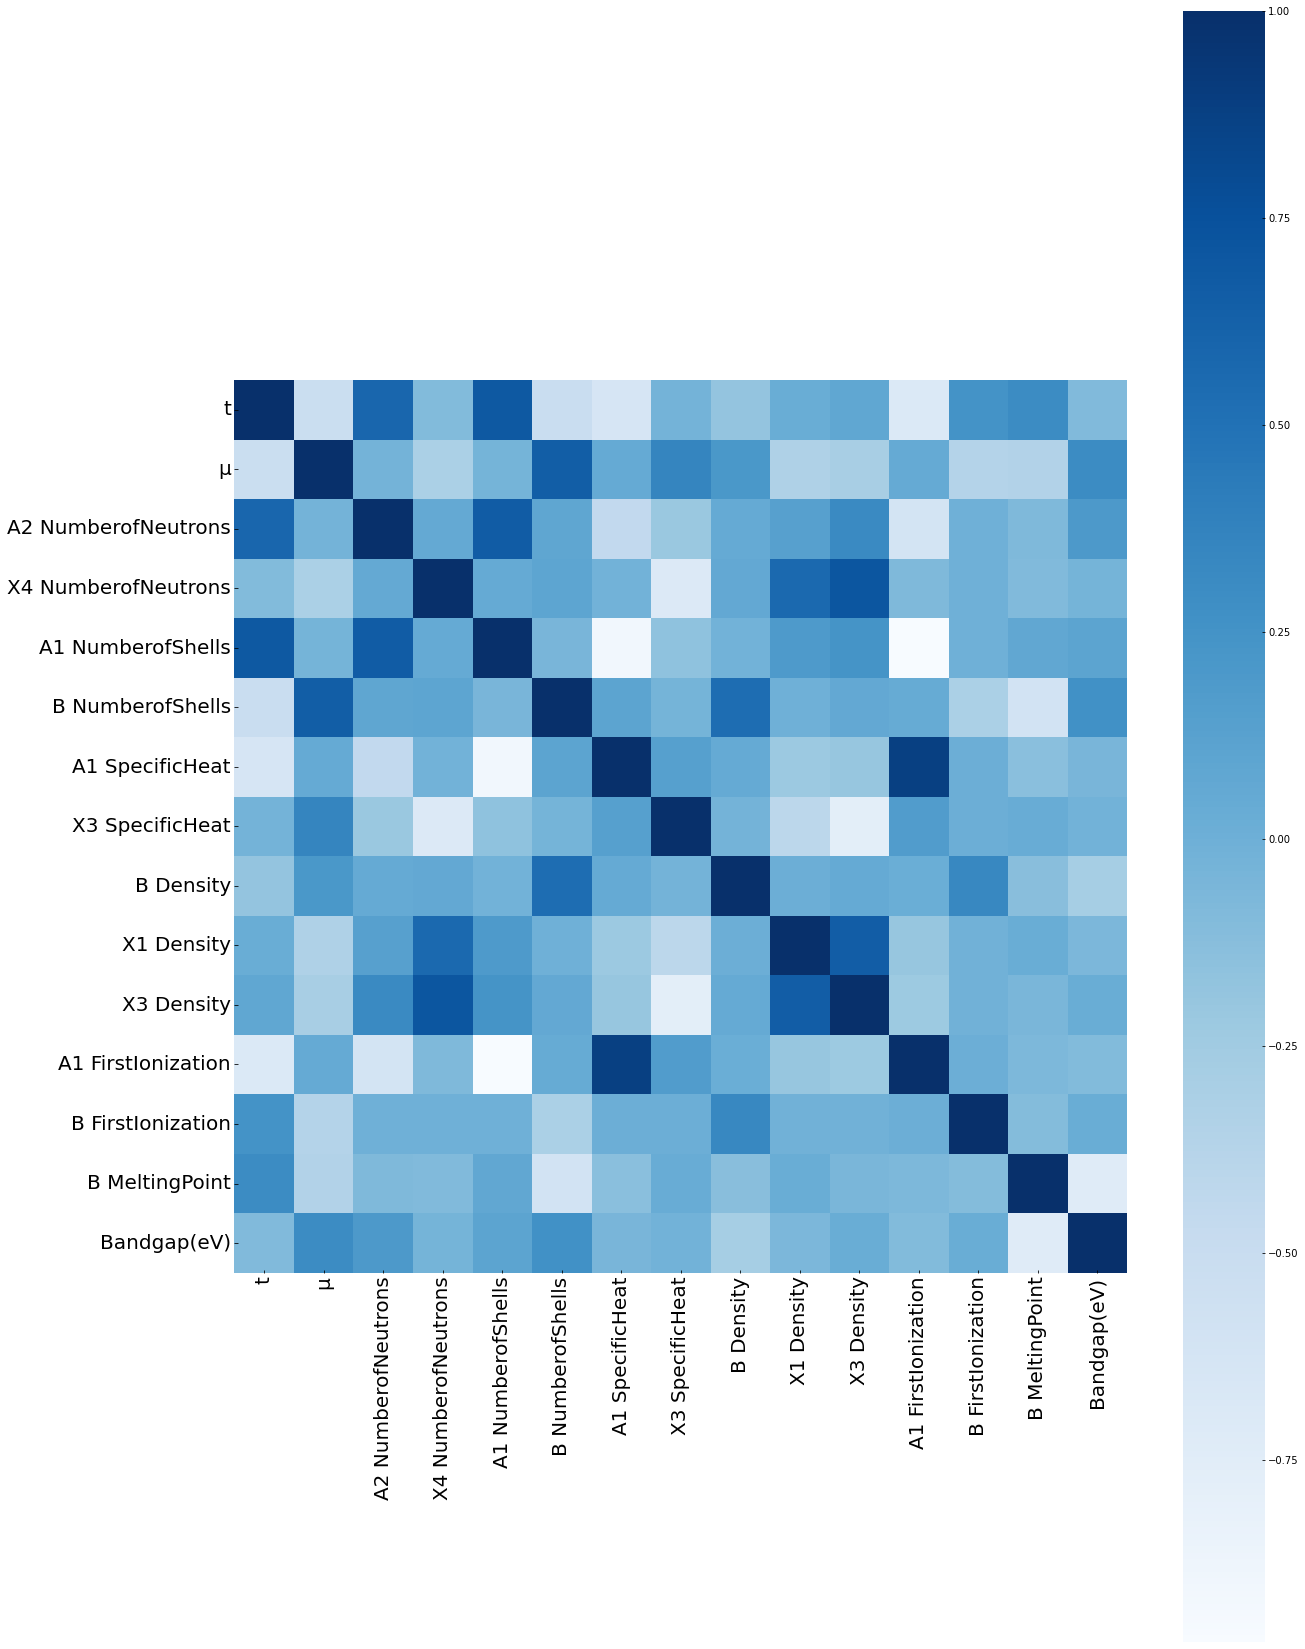

In [212]:
featureData=data.iloc[:,:]
corMat = DataFrame(featureData.corr())  #corr 求相关系数矩阵
print(corMat)
writer = pd.ExcelWriter('output1.xlsx')
corMat.to_excel(writer,'Sheet1')
writer.save()
plt.figure(figsize=(20, 30))
sns.heatmap(corMat, annot=False, vmax=1, square=True, cmap="Blues",linewidths=0) #annot_kws={"fontsize":20}
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plot.show()

In [213]:
#读取原数据集的特征和目标值
X = data.values[:, :-1]
y = data.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

for i in range(X_train.shape[1]):
    X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])

for i in range(X_test.shape[1]):
    X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

In [214]:
# # 选取4种分类算法
# # clf = RandomForestRegressor(n_estimators=160,random_state=80, min_samples_split=2,max_features=4,max_depth=7)
# #clf = svm.SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=4.0, epsilon=0.15 , shrinking=True, cache_size=200, verbose=False, max_iter=- 1)
# #clf=ExtraTreesRegressor(max_depth=2, n_estimators=200,random_state=20, min_samples_split=2)
# #kernel = 1.0 * RBF([1.0])
# #clf=GaussianProcessRegressor()

# from sklearn.neural_network import MLPRegressor
# from sklearn.model_selection import GridSearchCV

# # mlp_model = MLPRegressor()
# # mlp_model.fit(X_train, y_train)
# mlp = MLPRegressor(hidden_layer_sizes=[200,200],max_iter=10000,random_state=455,alpha=0.000001,batch_size="auto")


# mlp.fit(X_train, y_train)

# #保留小数点后三位
# #print('模型train得分：{:.3f}'.format(mlp.score(X_train, y_train)))
# print('模型test得分：{:.3f}'.format(mlp.score(X_test, y_test)))


# from sklearn.metrics import mean_squared_error #均方误差MSE
# from sklearn.metrics import mean_absolute_error #平方绝对误差MAE
# from sklearn.metrics import r2_score#R square
# from scipy.stats import pearsonr

# y_prediction=mlp.predict(X_test)


# MAE = mean_absolute_error(y_test, y_prediction)
# MSE = mean_squared_error(y_test, y_prediction)
# R2 = r2_score(y_test, y_prediction)
# r = pearsonr(y_test, y_prediction)
# rmse=np.sqrt(MSE)

# print('MAE', MAE)
# print('MSE', MSE)
# print('RMSE', rmse)
# print('R2', R2)
# print('r', r)


In [215]:
# plt.yticks(fontproperties = 'Times New Roman', size = 14)
# plt.xticks(fontproperties = 'Times New Roman', size = 14)
# plt.rcParams['font.sans-serif'] = 'Roman'
# plt.rcParams['xtick.direction'] = 'in'
# plt.rcParams['ytick.direction'] = 'in'
# plt.plot(y_test, y_test, label='Real Data')
# plt.scatter(y_test, y_prediction, label='Predict', c='r')
# ax=plt.gca()
# ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
# ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
# ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
# ax.spines['top'].set_linewidth(2)

# plt.tick_params(width=2)
# ax.xaxis.set_tick_params(labelsize=24)
# plt.tick_params(which='major',length=8)
# plt.tick_params(which='minor',length=4,width=2)
# ax.yaxis.set_tick_params(labelsize=24)
# xminorLocator   = MultipleLocator(1000)
# yminorLocator   = MultipleLocator(1000)
# ax.xaxis.set_minor_locator(xminorLocator)
# ax.yaxis.set_minor_locator(yminorLocator)
# plt.show()

In [230]:
# # 随机过采样
# ros = RandomOverSampler(random_state=0, sampling_strategy='auto')
# X_ros, y_ros = ros.fit_resample(X_train, y_train.astype('int'))
# print('随机过采样后标签数据统计：', Counter(y_ros))
# # random_state =[i for i in range(2,200)]
# # param_grid = {
# #     'criterion':['entropy','gini'],
# #     'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],   # 深度：这里是森林中每棵决策树的深度
# #     'n_estimators':[5, 7, 9, 11, 13, 15, 17, 19],  # 决策树个数-随机森林特有参数
# #     'max_features':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],  # 每棵决策树使用的变量占比-随机森林特有参数（结合原理）
# #     'min_samples_split':[2, 4, 8, 12, 16, 20, 24]  # 叶子的最小拆分样本
# # }
# param_grid = {
#     'criterion':['entropy','gini'],
#     'max_depth':[5, 6, 7, 8],   # 深度：这里是森林中每棵决策树的深度
#     'n_estimators':[11, 13, 15, 17],  # 决策树个数-随机森林特有参数
#     'max_features':[0.3, 0.4, 0.5],  # 每棵决策树使用的变量占比-随机森林特有参数（结合原理）
#     'min_samples_split':[2, 4, 8, 12, 16]  # 叶子的最小拆分样本
# }

# rfc = ensemble.RandomForestClassifier()
# rfc_cv = GridSearchCV(estimator=rfc, param_grid=param_grid,
#                       scoring='roc_auc', cv=4)
# rfc_cv.fit(X_ros, y_ros)
# print(rfc_cv.best_params_, rfc_cv.best_score_) # 输出最优参数及最优模型得分



# 随机过采样
ros = RandomOverSampler(random_state=0, sampling_strategy='auto')
X_ros, y_ros = ros.fit_resample(X_train, y_train.astype('int'))
print('随机过采样后标签数据统计：', Counter(y_ros))

param_grid = {
    'max_depth':[1,2,3,4,5, 6, 7, 8,9,10],   # 深度：这里是森林中每棵决策树的深度
    'n_estimators':[11, 13, 15, 17],  # 决策树个数-随机森林特有参数
    'max_features':[0.3, 0.4, 0.5],  # 每棵决策树使用的变量占比-随机森林特有参数（结合原理）
    'min_samples_split':[2, 4, 8, 12, 16]  # 叶子的最小拆分样本
}

rfr = ensemble.RandomForestRegressor()
rfr_cv = GridSearchCV(estimator=rfr, param_grid=param_grid,
                      scoring='neg_mean_squared_error', cv=10)
rfr_cv.fit(X_ros, y_ros)
print(rfr_cv.best_params_, rfr_cv.best_score_) # 输出最优参数及最优模型得分

随机过采样后标签数据统计： Counter({3: 81, 2: 81, 4: 81, 0: 81, 1: 81, 5: 81})
{'max_depth': 10, 'max_features': 0.3, 'min_samples_split': 2, 'n_estimators': 17} -0.11332544115013925


In [231]:
#选取4种分类算法
clf = RandomForestRegressor(n_estimators=17,random_state=80, min_samples_split=2,max_features=0.3,max_depth=10)
# #clf = svm.SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=4.0, epsilon=0.15 , shrinking=True, cache_size=200, verbose=False, max_iter=- 1)
# #clf=ExtraTreesRegressor(max_depth=2, n_estimators=200,random_state=20, min_samples_split=2)
# #kernel = 1.0 * RBF([1.0])
# #clf=GaussianProcessRegressor()
clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)

R2 0.9452695516895945
RMSE 0.5526277196309618
r (0.9484499723688029, 3.921514035105597e-31)


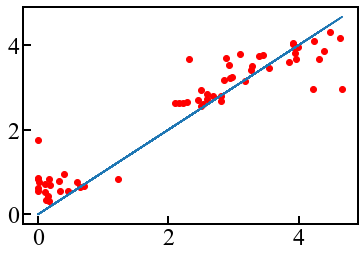

In [232]:
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst
print("R2",R2)
print("RMSE",rmse)
print("r",pearsonr(y_test, y_prediction))
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.show()

In [233]:
#使用KFold交叉验证

for nk in range(2,10):
 kfolder = KFold(n_splits=nk)
 score=0
 for train, test in kfolder.split(X_train, y_train):
   train_data = np.array(data)[train]
   test_data = np.array(data)[test]
   trany=train_data[:,14]
   tranx=train_data[:,:14]
   testx=test_data[:,:14]
   testy=test_data[:,14]
   clf.fit(tranx,trany)
   pu=pearsonr(testy,clf.predict(testx))
   score=score+pu[0]
 print(score/nk)

0.11778791304011337
0.6530034527276771
0.7703581613698999
0.7038279458182293
0.7043266260720399
0.661424996877189
0.7536537098071079
0.6756062746116509


In [279]:
#符号回归暂时有问题，需要debug

#读取原数据集的特征和目标值
X = data.values[:, :-1]
y = data.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

for i in range(X_train.shape[1]):
    X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])

for i in range(X_test.shape[1]):
    X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])
    
#符号回归   
est_gp = genetic.SymbolicTransformer(population_size=5000,
                           generations=20, stopping_criteria=0,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)

function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min']

V=est_gp.fit(X_train, y_train)
#print(V)
px=V.transform(X_train)
for i in range(0,100):
  pear=np.corrcoef(px[:,i], y_train)
  pea=pear[0,1]
  if abs(pea)>0.65:
   print(pea, V)
# mse = mean_squared_error(y_train, px[:,i])
# print ("mse: ",mse)
#     rmse = mse ** (1/2)
#     sse = np.sum((y_test - y_prediction) ** 2)
#     sst = np.sum((y_test - np.mean(X_test)) ** 2)
#     R2= 1 - sse / sst

# V=est_gp.fit(X_test, y_test)
# print(V)
# px=V.transform(X_test)
# for i in range(0,1001):
#   pear=np.corrcoef(px[:,i], y_test)
#   pea=pear[0,1]
#   if abs(pea)>0.6:
#    print(pea,V)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    26.46         0.135163        3         0.829276         0.765711      1.22m
-0.8240101923700445 [mul(X8, X13),
 add(X13, add(add(X13, X5), add(X8, X11))),
 sub(sub(div(X13, -0.403), add(X3, X3)), sub(div(X13, X4), mul(X12, X1))),
 sub(sub(mul(X13, X13), sub(X10, X13)), mul(sub(X0, X8), mul(X11, X5))),
 div(X13, div(X0, X12)),
 div(X13, div(X4, X8)),
 sub(X13, X2),
 add(mul(X6, X10), X13),
 sub(X11, add(X13, X6)),
 mul(mul(sub(X13, X5), add(X11, X12)), div(add(X8, X13), mul(X6, X2)))]
-0.7020572934094818 [mul(X8, X13),
 add(X13, add(add(X13, X5), add(X8, X11))),
 sub(sub(div(X13, -0.403), add(X3, X3)), sub(div(X13, X4), mul(X12, X1))),
 sub(sub(mul(X13, X13), sub(X10, X13)), mul(sub(X0, X8), mul(X11, X5))),
 div(X13, div(X0, X12)),
 div(

IndexError: index 10 is out of bounds for axis 1 with size 10

In [280]:
dataset='Bandgap Predict.xlsx'
data=pd.DataFrame(pd.read_excel(dataset))
featureData1 = data.values[:,:]
# StandardScaler.fit(featureData1)
# featureData2 = StandardScaler.transform(featureData1)
# print(featureData2)
predict = clf.predict(featureData1)

predict_Ef = pd.DataFrame(predict)
writer = pd.ExcelWriter('Bandgap-predict_ZL.xlsx')
predict_Ef.to_excel(writer,'Sheet1')
writer.save()